## Sinus waves
Create two sinus waves with given frequencies and combine these in to one signal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the signal frequencies and the amount of steps
signFreq1     = 27 #Hz
signFreq2     = 35 #Hz
steps         = 0.001

npTime        = np.arange(start=0,stop=1,step=steps)
npSin1        = np.sin(2*np.pi*signFreq1*npTime)
npSin2        = np.sin(2*np.pi*signFreq2*npTime)
cleanSignal   = npSin1 + npSin2

## Plot the clean signals
Format the plotting area

In [2]:
plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams.update({'font.size':18})

## Plot the signals
Plot all the signals in individually.

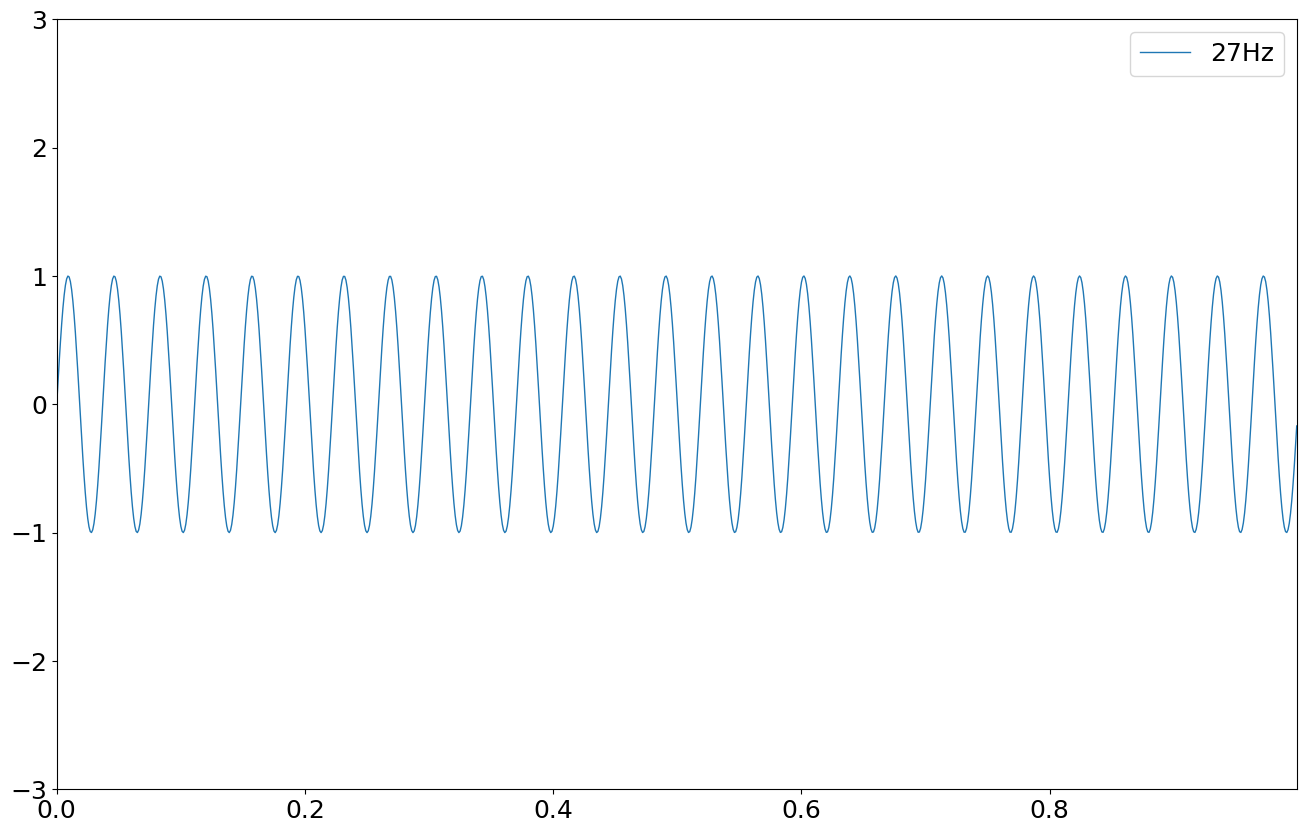

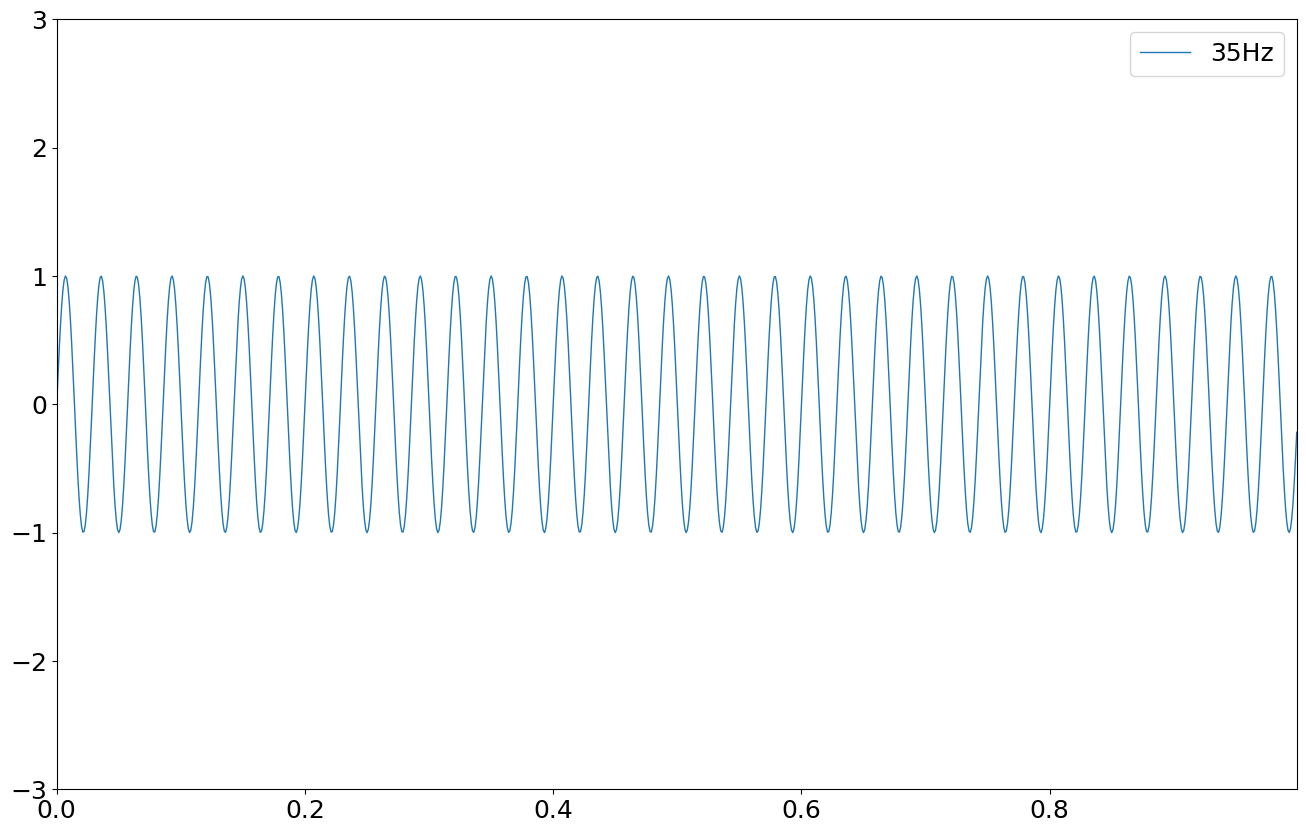

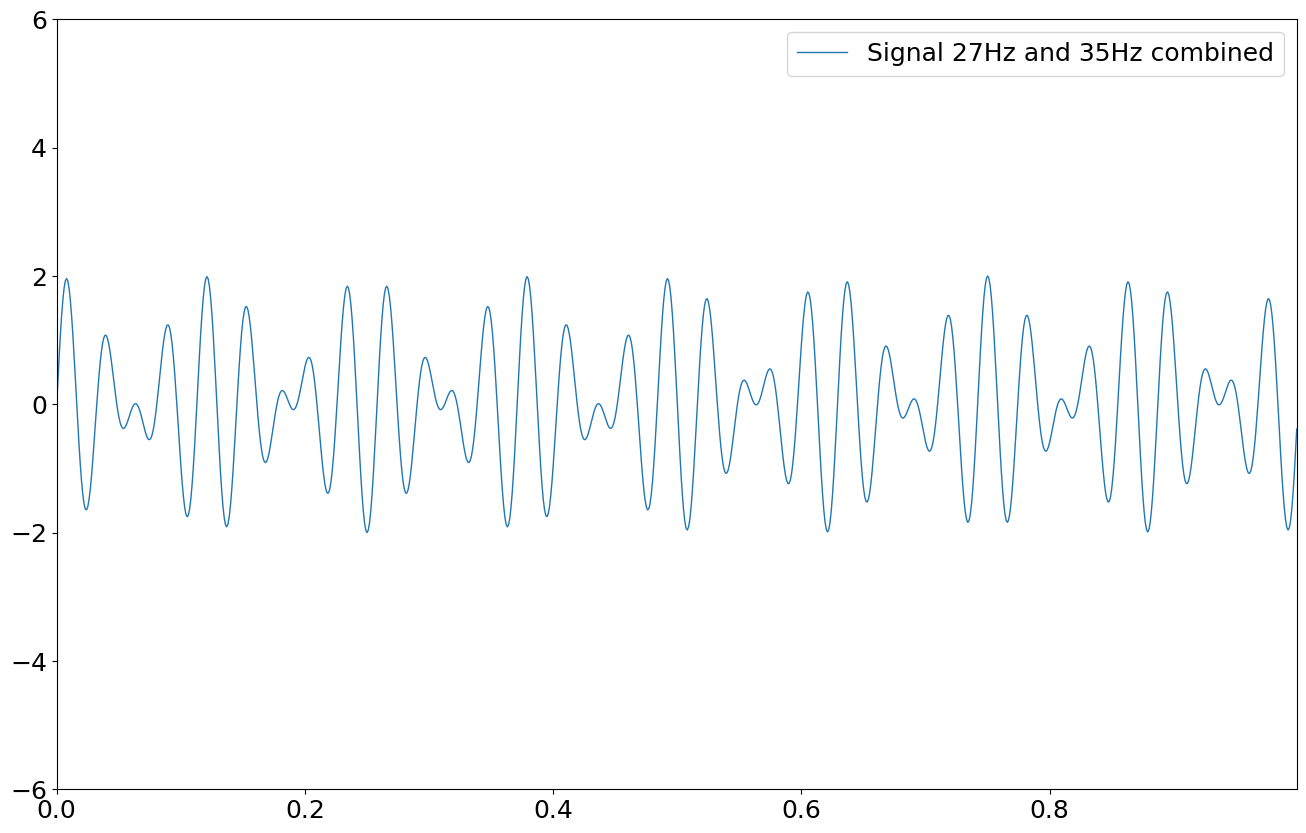

In [3]:
## Sinus frequency 1
plt.plot(npTime,npSin1,linewidth=1,label=str(signFreq1)+"Hz")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

## Sinus frequency 2
plt.plot(npTime,npSin2,linewidth=1,label=str(signFreq2)+"Hz")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

## Combined signal, clean
plt.plot(npTime,cleanSignal,linewidth=1,label="Signal "+str(signFreq1)+"Hz and "+str(signFreq2) + "Hz combined")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

## Noise
Let's add some noise to the signal and see how it looks like with it

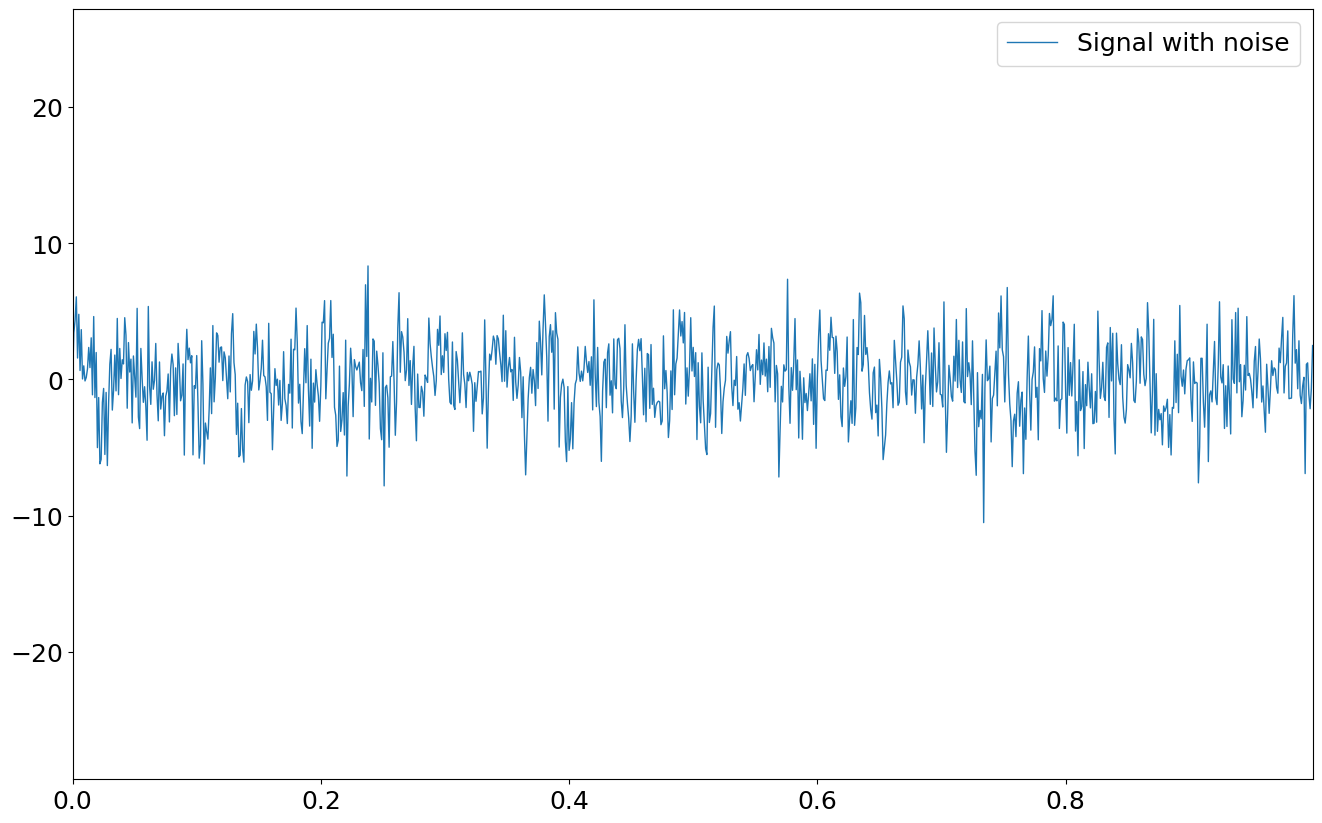

In [4]:
## Adding some random noise to the signal
noise           = 2.5*np.random.randn(len(npTime))
noiseSignal     = cleanSignal + noise

## Plot the noise signal
plt.plot(npTime,noiseSignal,linewidth=1,label="Signal with noise")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

## Discrete Fourier transform
Using scipy's built in Discrete Fourier transform library to get the signal from Time to Frequency domain (X-axis will be frequency instead of time).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html

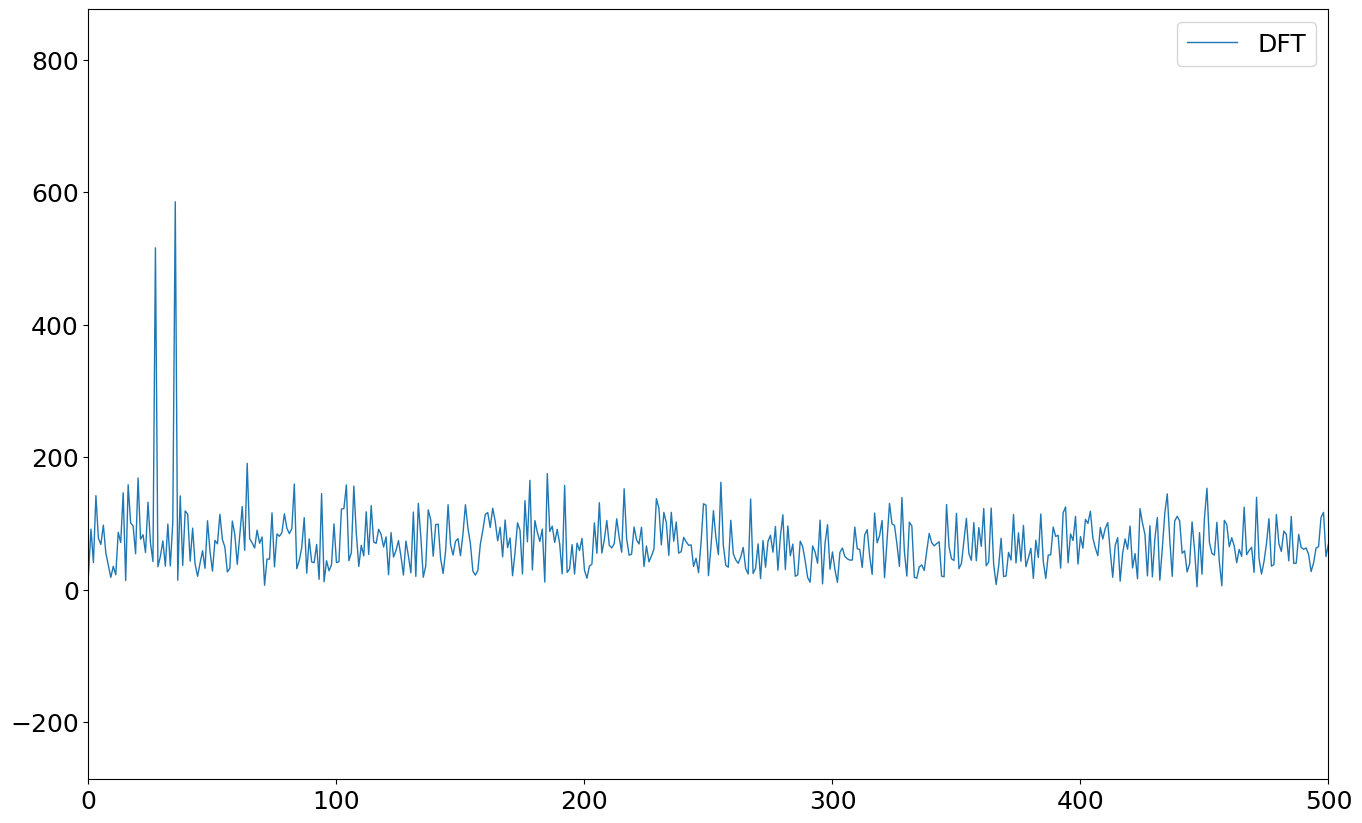

In [5]:
from scipy.fft import rfft,rfftfreq
n    = len(npTime)
yf   = rfft(noiseSignal)
xf   = rfftfreq(n,steps)
plt.plot(xf,np.abs(yf),linewidth=1,label="DFT")
plt.margins(x=0, y=0.5)
plt.legend()
plt.show()

## Remove noise in the fourier graph
From the frequency graph we can see that there is two frequencies that is more common (higher Y-values). Let's filter out the other frequencies!

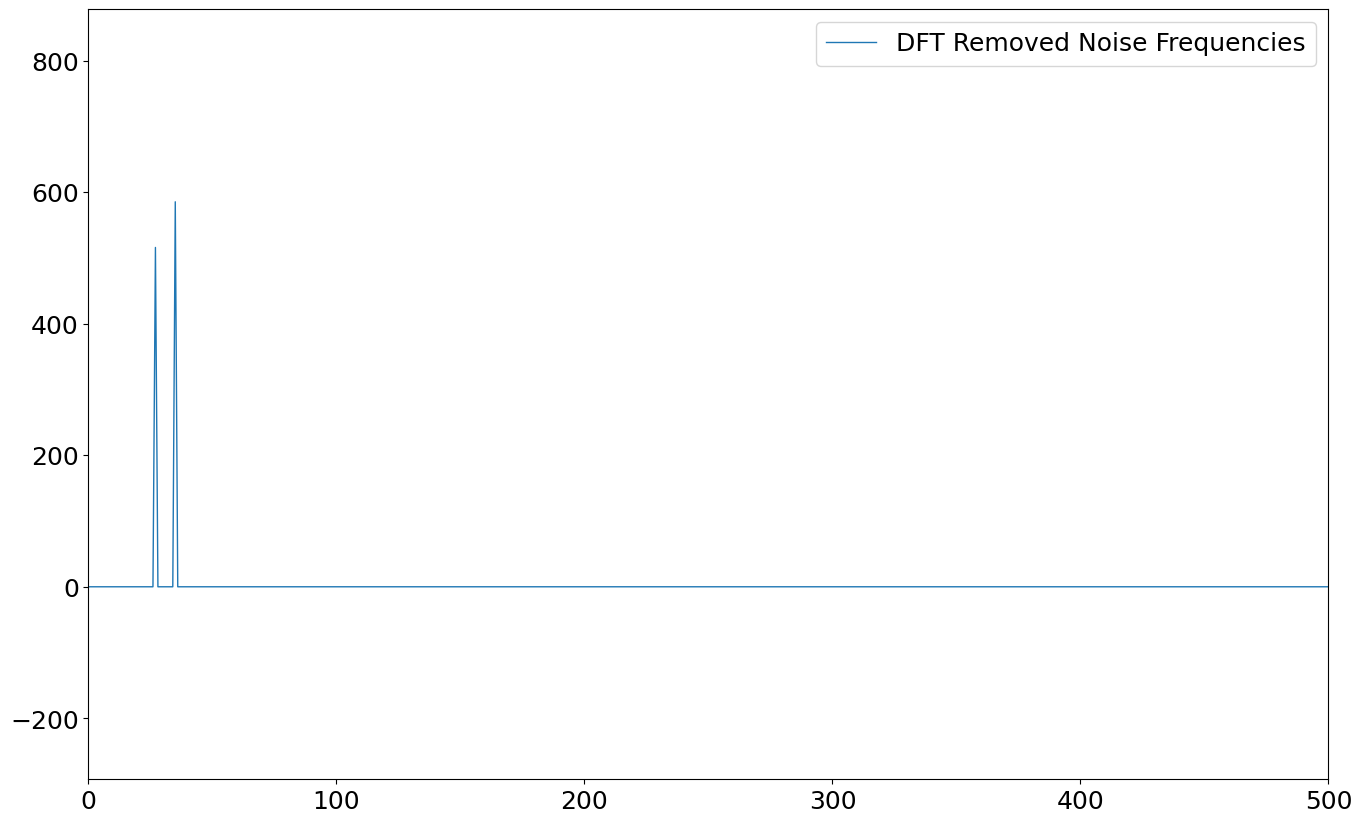

In [6]:
yf_abs      = np.abs(yf) 
indices     = yf_abs>300   # filter out those value under 300
yfClean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yfClean),linewidth=1,label="DFT Removed Noise Frequencies")
plt.margins(x=0, y=0.5)
plt.legend()
plt.show()

## Inverse back to Time-Domain data

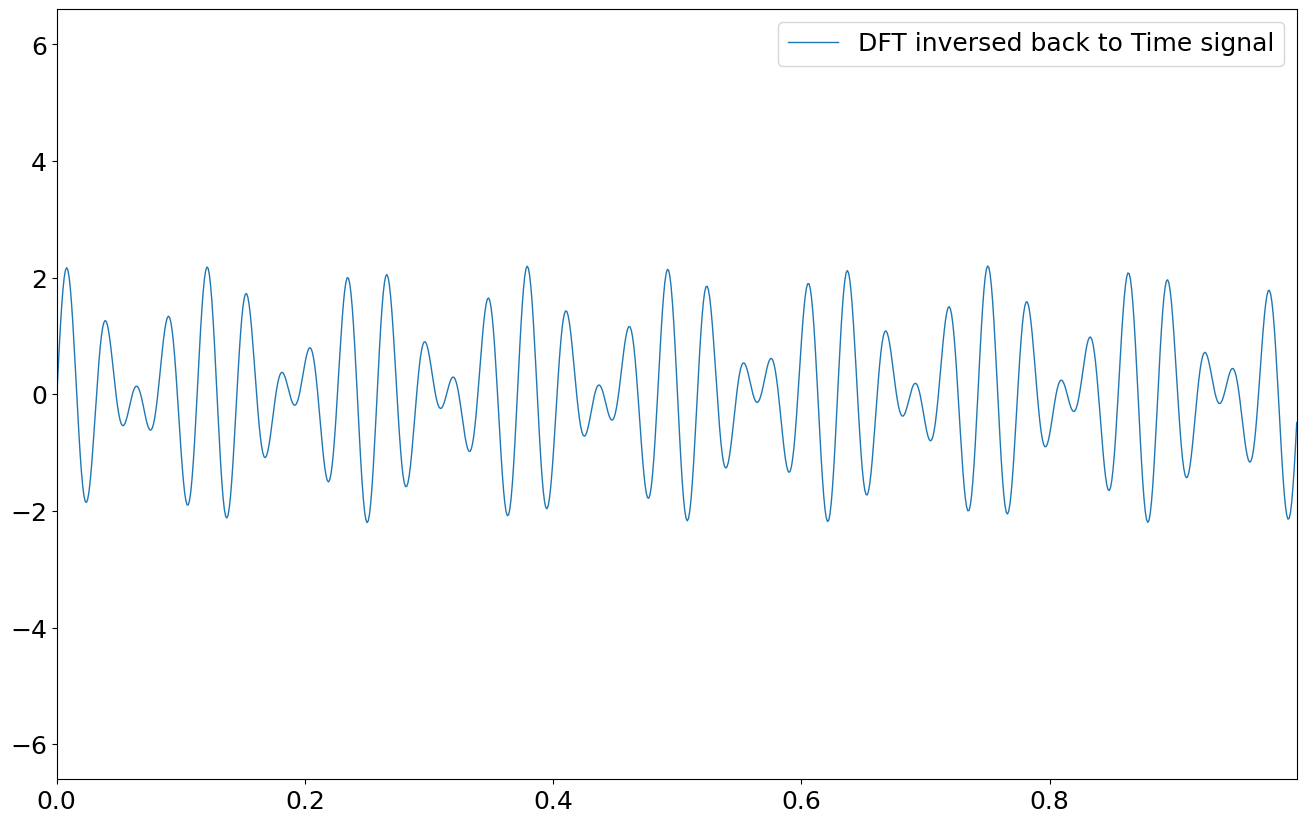

In [7]:
from scipy.fft import irfft
newFClean = irfft(yfClean)
plt.plot(npTime,newFClean,linewidth=1,label="DFT inversed back to Time signal")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

## Conclusion
We have now combined two sinus signals, added noise, used Fourier transform to understand the frequencies, filtered out the noise and inversed back to a clean signal!